This notebook follows the topics discussed in [logistic regression course notes](coursera-logistic-reg/). Please refer to that page for context. This notebook tries to implement the concepts in Python, instead of MatLab/Octave. I have borrowed some inspiration and code from this [blog](http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-sigmoid-function" data-toc-modified-id="Plot-sigmoid-function-1">Plot sigmoid function</a></span></li><li><span><a href="#Plot-ellipsis-function" data-toc-modified-id="Plot-ellipsis-function-2">Plot ellipsis function</a></span></li><li><span><a href="#Plot-loss-function-for-logistic-regression" data-toc-modified-id="Plot-loss-function-for-logistic-regression-3">Plot loss function for logistic regression</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

## Plot sigmoid function
To bound our probability predictions between `0-1`, we use a sigmoid function. Its definition is below.

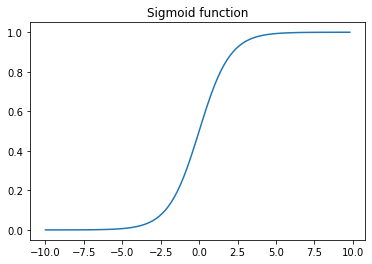

In [2]:
vals = np.arange(-10,10,0.2)
gz= 1/(1+np.e**(0-vals))
plt.plot(vals, gz)
plt.title('Sigmoid function');

## Plot loss function for logistic regression

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


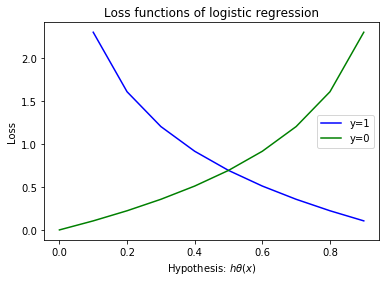

In [3]:
xvals = np.arange(0,1,0.1)
y1vals = 0-np.log(xvals)
y0vals = 0-np.log(1-xvals)
plt.plot(xvals, y1vals, 'b', label='y=1')
plt.plot(xvals, y0vals, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.legend()
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss');

## Load and visualize training data

In [7]:
from numpy import loadtxt, where

#load the dataset
data_path = '/Users/atma6951/Documents/code/pychakras/pyChakras/ml/coursera-ml-matlabonline/machine-learning-ex/ex2'
data = loadtxt(f'{data_path}/ex2data1.txt', delimiter=',')
data.shape

(100, 3)

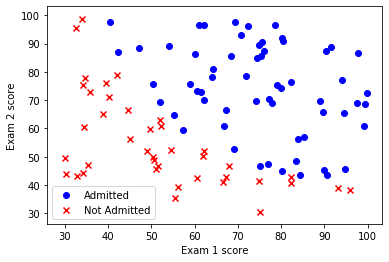

In [9]:
# set dependent and independent variables.
X = data[:, 0:2]
y = data[:, 2]

# find positive and negative cases
pos = where(y == 1)
neg = where(y == 0)

# plot the data
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted']);

## Define sigmoid and cost functions

In [15]:
np.e**2

7.3890560989306495

In [16]:
def sigmoid(z):
    denom = 1+np.e**(0-z)
    return 1/denom

In [19]:
np.log(3)

1.0986122886681098

In [ ]:
np.transpose()

In [20]:
def cost_function(theta, X, y):
    m=np.size(y)  # number of training samples
    
    h_theta_x = sigmoid(np.dot(X,theta))
    term1 = (0-y)*np.log(h_theta_x)
    term2 = (1-y)*np.log(1-h_theta_x)
    J = (1/m)*(term1-term2)
    
    grad = np.dot(np.tranpose(h_theta_x - y),X)
    grad = grad/m
    
    return (J, grad)